In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [13]:
Cars = pd.read_csv(r"C:\Users\User\Downloads\Automobile (1).csv")

In [17]:
print(Cars)

                          name   mpg  cylinders  displacement  horsepower  \
0    chevrolet chevelle malibu  18.0          8         307.0       130.0   
1            buick skylark 320  15.0          8         350.0       165.0   
2           plymouth satellite  18.0          8         318.0       150.0   
3                amc rebel sst  16.0          8         304.0       150.0   
4                  ford torino  17.0          8         302.0       140.0   
..                         ...   ...        ...           ...         ...   
393            ford mustang gl  27.0          4         140.0        86.0   
394                  vw pickup  44.0          4          97.0        52.0   
395              dodge rampage  32.0          4         135.0        84.0   
396                ford ranger  28.0          4         120.0        79.0   
397                 chevy s-10  31.0          4         119.0        82.0   

     weight  acceleration  model_year  origin  
0      3504          12.0  

In [19]:
numerical_features = Cars.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical Columns:")
print(numerical_features)


Numerical Columns:
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')


In [21]:
for column in numerical_features:
    column_range = Cars[column].max() - Cars[column].min()
    print(f"Range of '{column}': {column_range}")

Range of 'mpg': 37.6
Range of 'cylinders': 5
Range of 'displacement': 387.0
Range of 'horsepower': 184.0
Range of 'weight': 3527
Range of 'acceleration': 16.8
Range of 'model_year': 12


In [23]:
features_to_scale = ['mpg', 'cylinders', 'horsepower', 'weight', 'acceleration','model_year']

In [25]:
Cars

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


In [29]:
scaler_minmax = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(Cars[features_to_scale]), columns=features_to_scale)
print("\nDataset After Min-Max Scaling:")
df_minmax_scaled


Dataset After Min-Max Scaling:


,mpg,cylinders,horsepower,weight,acceleration,model_year
0,0.239362,1.0,0.456522,0.536150,0.238095,0.0
1,0.159574,1.0,0.646739,0.589736,0.208333,0.0
2,0.239362,1.0,0.565217,0.516870,0.178571,0.0
3,0.186170,1.0,0.565217,0.516019,0.238095,0.0
4,0.212766,1.0,0.510870,0.520556,0.148810,0.0
...,...,...,...,...,...,...
393,0.478723,0.2,0.217391,0.333711,0.452381,1.0
394,0.930851,0.2,0.032609,0.146583,0.988095,1.0
395,0.611702,0.2,0.206522,0.193365,0.214286,1.0
396,0.505319,0.2,0.179348,0.286929,0.630952,1.0


In [33]:
print("\nOriginal Dataset:")
Cars[features_to_scale]


Original Dataset:


,mpg,cylinders,horsepower,weight,acceleration,model_year
0,18.0,8,130.0,3504,12.0,70
1,15.0,8,165.0,3693,11.5,70
2,18.0,8,150.0,3436,11.0,70
3,16.0,8,150.0,3433,12.0,70
4,17.0,8,140.0,3449,10.5,70
...,...,...,...,...,...,...
393,27.0,4,86.0,2790,15.6,82
394,44.0,4,52.0,2130,24.6,82
395,32.0,4,84.0,2295,11.6,82
396,28.0,4,79.0,2625,18.6,82


In [87]:
print("\nMax Value of 'HorsePower' in Original Dataset:")
Cars['displacement'].max()



Max Value of 'HorsePower' in Original Dataset:


455.0

In [89]:
print("\nMax Value of 'Model_Years' in Original Dataset:")
Cars['model_year'].max()


Max Value of 'Model_Years' in Original Dataset:


1.6219833948601288

In [45]:
scaler_standard = StandardScaler()
df_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(Cars[features_to_scale]), columns=features_to_scale)
print("\nDataset After Standardization (Z-score Normalization):")
df_standard_scaled


Dataset After Standardization (Z-score Normalization):


,mpg,cylinders,horsepower,weight,acceleration,model_year
0,-0.706439,1.498191,0.664133,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.574594,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.184397,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.184397,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,0.924265,0.565841,-1.840117,-1.627426
...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.480448,-0.213324,0.011586,1.621983
394,2.624265,-0.856321,-1.364896,-0.993671,3.279296,1.621983
395,1.087017,-0.856321,-0.532474,-0.798585,-1.440730,1.621983
396,0.574601,-0.856321,-0.662540,-0.408411,1.100822,1.621983


In [91]:
print("\nOriginal Dataset:")
Cars[features_to_scale]


Original Dataset:


,mpg,cylinders,horsepower,weight,acceleration,model_year
0,-0.706439,1.498191,0.664133,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.574594,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.184397,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.184397,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,0.924265,0.565841,-1.840117,-1.627426
...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.480448,-0.213324,0.011586,1.621983
394,2.624265,-0.856321,-1.364896,-0.993671,3.279296,1.621983
395,1.087017,-0.856321,-0.532474,-0.798585,-1.440730,1.621983
396,0.574601,-0.856321,-0.662540,-0.408411,1.100822,1.621983


In [93]:
Cars[features_to_scale] = df_standard_scaled
print("\nUpdated Dataset:")
Cars[features_to_scale]


Updated Dataset:


,mpg,cylinders,horsepower,weight,acceleration,model_year
0,-0.706439,1.498191,0.664133,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.574594,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.184397,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.184397,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,0.924265,0.565841,-1.840117,-1.627426
...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.480448,-0.213324,0.011586,1.621983
394,2.624265,-0.856321,-1.364896,-0.993671,3.279296,1.621983
395,1.087017,-0.856321,-0.532474,-0.798585,-1.440730,1.621983
396,0.574601,-0.856321,-0.662540,-0.408411,1.100822,1.621983


In [95]:
categorical_columns = Cars.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['name', 'origin'], dtype='object')


In [97]:
Cars['Released_Year'] = pd.to_datetime(Cars['model_year'], errors='coerce')
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           398 non-null    object        
 1   mpg            398 non-null    float64       
 2   cylinders      398 non-null    float64       
 3   displacement   398 non-null    float64       
 4   horsepower     392 non-null    float64       
 5   weight         398 non-null    float64       
 6   acceleration   398 non-null    float64       
 7   model_year     398 non-null    float64       
 8   origin         398 non-null    object        
 9   Released_Year  398 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 31.2+ KB


In [99]:
Cars

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Released_Year
0,chevrolet chevelle malibu,-0.706439,1.498191,307.0,0.664133,0.630870,-1.295498,-1.627426,usa,1969-12-31 23:59:59.999999999
1,buick skylark 320,-1.090751,1.498191,350.0,1.574594,0.854333,-1.477038,-1.627426,usa,1969-12-31 23:59:59.999999999
2,plymouth satellite,-0.706439,1.498191,318.0,1.184397,0.550470,-1.658577,-1.627426,usa,1969-12-31 23:59:59.999999999
3,amc rebel sst,-0.962647,1.498191,304.0,1.184397,0.546923,-1.295498,-1.627426,usa,1969-12-31 23:59:59.999999999
4,ford torino,-0.834543,1.498191,302.0,0.924265,0.565841,-1.840117,-1.627426,usa,1969-12-31 23:59:59.999999999
...,...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,0.446497,-0.856321,140.0,-0.480448,-0.213324,0.011586,1.621983,usa,1970-01-01 00:00:00.000000001
394,vw pickup,2.624265,-0.856321,97.0,-1.364896,-0.993671,3.279296,1.621983,europe,1970-01-01 00:00:00.000000001
395,dodge rampage,1.087017,-0.856321,135.0,-0.532474,-0.798585,-1.440730,1.621983,usa,1970-01-01 00:00:00.000000001
396,ford ranger,0.574601,-0.856321,120.0,-0.662540,-0.408411,1.100822,1.621983,usa,1970-01-01 00:00:00.000000001


In [103]:
categorical_columns = Cars.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['name', 'origin'], dtype='object')


In [105]:
Q1 = Cars.select_dtypes(include=['number']).quantile(0.25)
Q3 = Cars.select_dtypes(include=['number']).quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (Cars.select_dtypes(include=['number']) < (Q1 - 1.5 * IQR)) | (Cars.select_dtypes(include=['number']) > (Q3 + 1.5 * IQR))
print("\nOutliers:")
outliers


Outliers:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False
394,False,False,False,False,False,True,False
395,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False


In [109]:
# WHat was IQR lower range for Runtime
print("\nIQR Lower Range for 'Model year':")
print(Q1['displacement'] - 1.5 * IQR['displacement'])

# WHat was IQR upper range for Runtime
print("\nIQR Upper Range for 'Model Year':")
print(Q3['displacement'] + 1.5 * IQR['displacement'])

# show all Runtime values that are outliers as series
print("\nModel Year Outliers:")
Cars[outliers['displacement']]['displacement']


IQR Lower Range for 'Model year':
-132.375

IQR Upper Range for 'Model Year':
498.625

Model Year Outliers:


Series([], Name: displacement, dtype: float64)

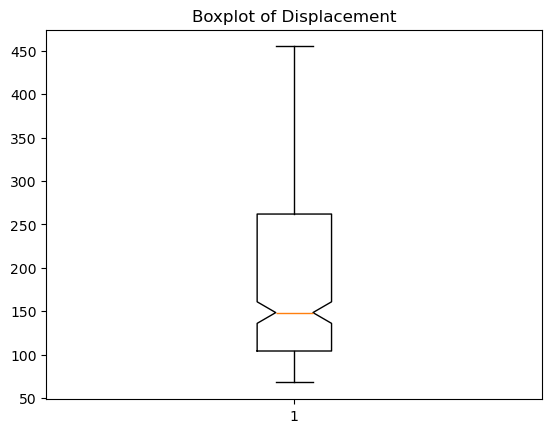

In [131]:
import matplotlib.pyplot as plt
plt.boxplot(Cars['displacement'],['horsepower'])
plt.title('Boxplot of Displacement')
plt.show()